<a href="https://colab.research.google.com/github/EkinAkym/machine_learning/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ekin Akyildirim
2200357029
ELE-489 HW-1

Imports:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

Dataset:

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.csv


--2025-04-03 17:38:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.csv’

wine.csv                [ <=>                ]  10.53K  --.-KB/s    in 0s      

2025-04-03 17:38:59 (59.2 MB/s) - ‘wine.csv’ saved [10782]



Dataframe:

In [4]:
variables = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
           "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
           "Color_intensity", "Hue", "OD280_OD315", "Proline"]

df = pd.read_csv("wine.csv", header=None, names=variables)


df.head()


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Info:

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Class Counts:

In [6]:
df["Class"].value_counts()


,count
Class,
2,71
1,59
3,48


Histograms:

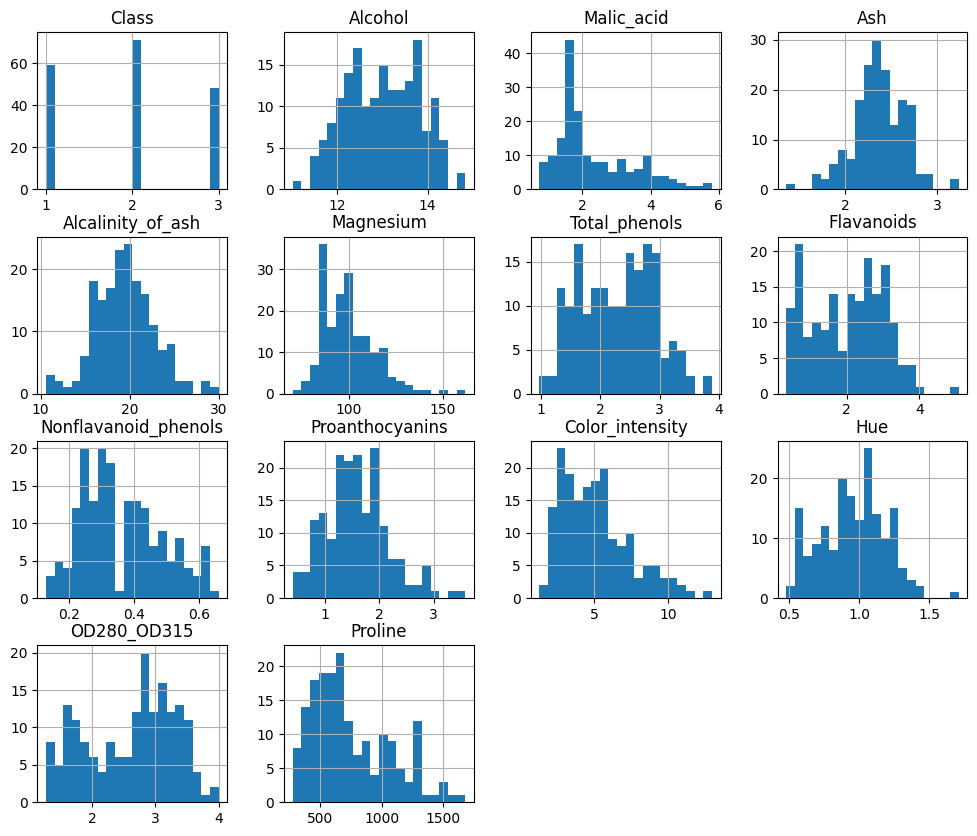

In [7]:
df.hist(figsize=(12,10), bins=20)
plt.show()


**Null** Check:

In [8]:
df.isnull().sum()


,0
Class,0
Alcohol,0
Malic_acid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0


Overlap Check

In [9]:
df.duplicated().sum()

np.int64(0)

Normalizing:

In [10]:
from sklearn.preprocessing import MinMaxScaler

sclr = MinMaxScaler()
x = df.drop("Class",axis = 1) # drop class variable
x_scld = sclr.fit_transform(x) # compress 0-1
df_scaled = pd.DataFrame(x_scld, columns=x.columns) #dataframe
df_scaled["Class"] = df["Class"] # add class variable again
df_scaled.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline,Class
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


Split the Data:


In [11]:
x = df_scaled.drop("Class", axis = 1) # features
y = df_scaled["Class"] # tags

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 50)
print(f"Training: {x_train.shape}, Testing: {x_test.shape}")

Training: (142, 13), Testing: (36, 13)


KNN IMPLEMENTATION:

In [12]:
from collections import Counter
import numpy as np
def euclidean_dis(x1,x2):
  return np.sqrt(np.sum((x1 - x2)** 2)) #Euclidean
def manhattan_dis(x1,x2): #Manhattan
  return np.sum(np.abs(x1-x2))

class k_nn:
  def __init__(knn, k=7, dis_calc="euclidean"):  #Initilaziton
    knn.k = k
    knn.dis_calc = dis_calc
  def train (knn,x_train,y_train): #Train
    knn.x_train = x_train
    knn.y_train = y_train
  def result (knn,x_test): #Final Result
    results = [knn._predict(x) for x in x_test]
    return np.array(results)
  def _predict (knn,x): # Prediction Mechanism
    if knn.dis_calc == "euclidean":
      distances = [euclidean_dis(x,x_train) for x_train in knn.x_train]
    else:
      distances = [manhattan_dis(x,x_train) for x_train in knn.x_train]

    k_index = np.argsort(distances)[:knn.k]
    k_nearest = [knn.y_train[i] for i in k_index]
    most_common = Counter(k_nearest).most_common(1)
    return most_common[0][0]







Accuracy Score for Euclidean:

In [13]:
from sklearn.metrics import accuracy_score
k_values = [1,3,5,7,9,11]
accuracies = []
for k in k_values:
  model = k_nn(k=k, dis_calc="euclidean")
  model.train(x_train.values, y_train.values)
  y_pred = model.result(x_test.values)
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)
  print(f"Accuracy for K = {k} is : {acc:.2f}")

Accuracy for K = 1 is : 0.94
Accuracy for K = 3 is : 0.94
Accuracy for K = 5 is : 0.94
Accuracy for K = 7 is : 0.94
Accuracy for K = 9 is : 0.94
Accuracy for K = 11 is : 0.94


Accuracy Score Plot for Eucliddean:

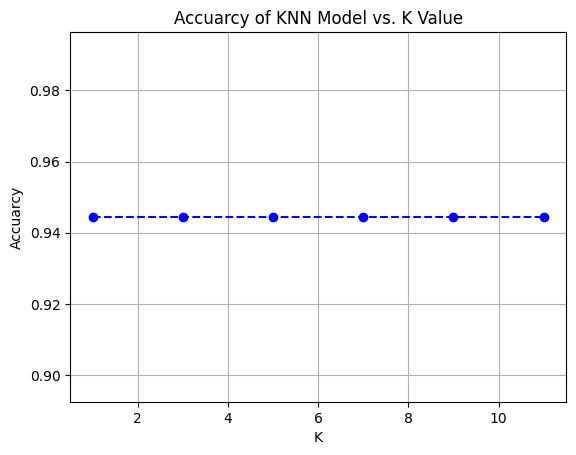

In [14]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("K")
plt.ylabel("Accuarcy")
plt.title("Accuarcy of KNN Model vs. K Value")
plt.grid()
plt.show()


Confusion Matrix and Classification Report for Euclidean:

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[13  0  0]
 [ 1 12  1]
 [ 0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92        14
           3       0.90      1.00      0.95         9

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



Accuracy Score for Manhattan:

In [16]:
from sklearn.metrics import accuracy_score
k_values = [1,3,5,7,9,11]
accuracies = []
for k in k_values:
  model = k_nn(k=k, dis_calc="manhattan")
  model.train(x_train.values, y_train.values)
  y_pred = model.result(x_test.values)
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)
  print(f"Accuracy for K = {k} is : {acc:.2f}")

Accuracy for K = 1 is : 0.97
Accuracy for K = 3 is : 0.94
Accuracy for K = 5 is : 0.94
Accuracy for K = 7 is : 0.94
Accuracy for K = 9 is : 0.94
Accuracy for K = 11 is : 0.97


Accuracy Score Plot for Manhattan:

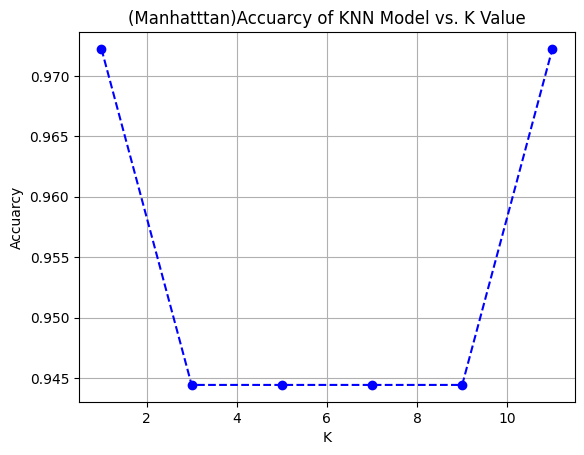

In [17]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("K")
plt.ylabel("Accuarcy")
plt.title("(Manhatttan)Accuarcy of KNN Model vs. K Value")
plt.grid()
plt.show()


Confusion Matrix and Classification Report for Manhattan:

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13  0  0]
 [ 1 13  0]
 [ 0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

